# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/대외활동/동아리/투빅스/2주차/assignment3_creditcard.csv")

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [10]:
X=data.drop(['Class'],axis=1)
y=data.Class

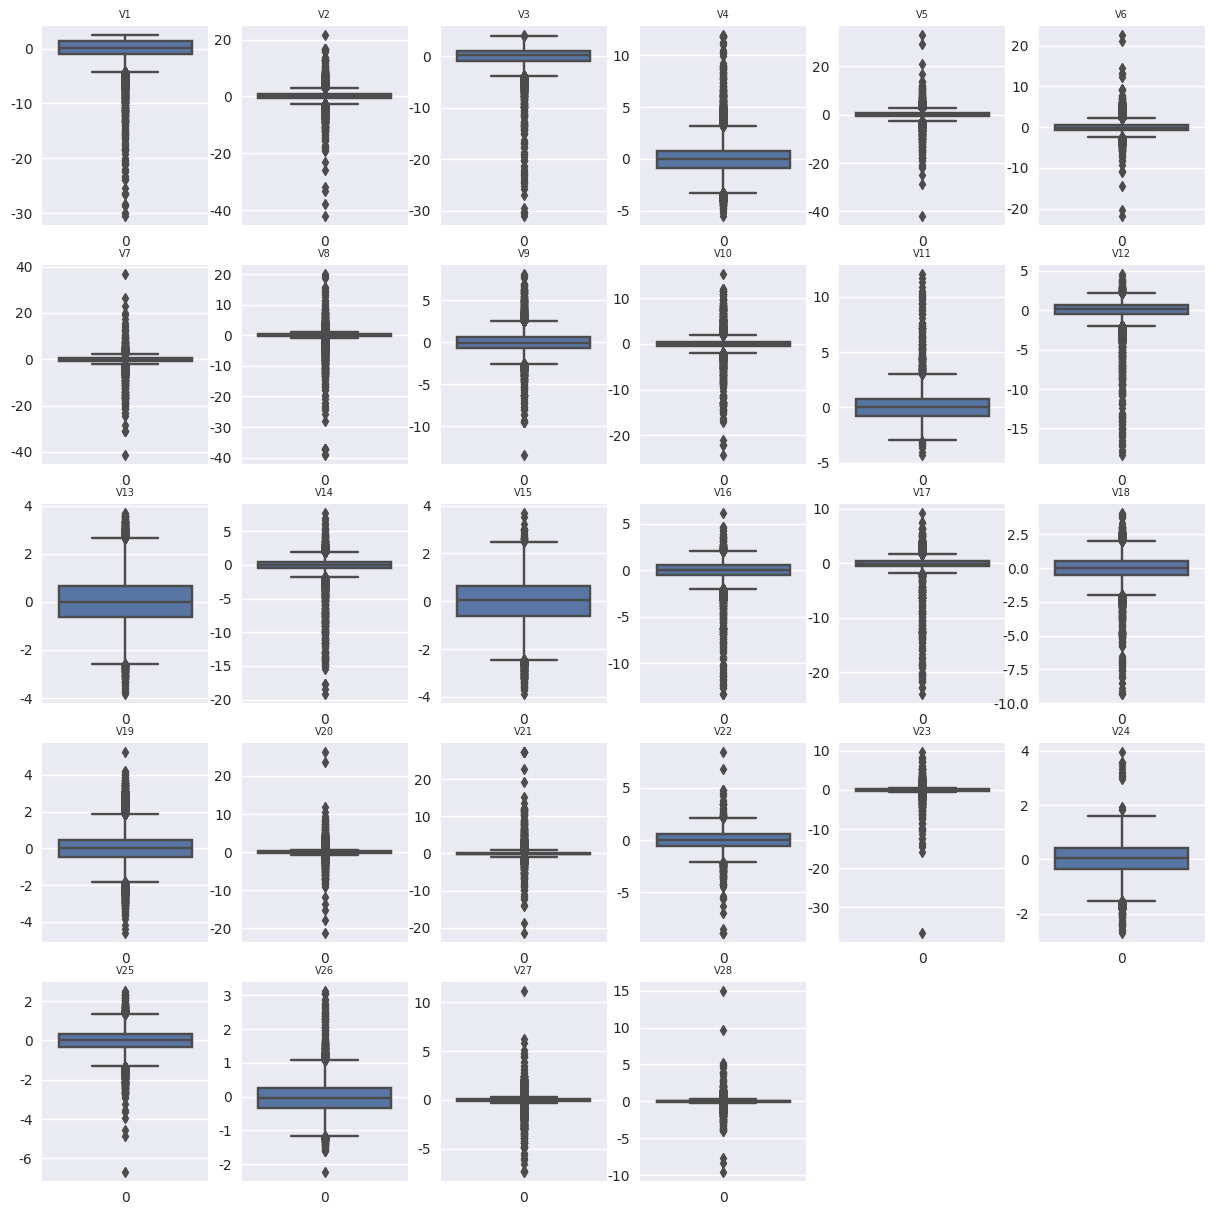

In [22]:
plt.figure(figsize=(15, 15))
for idx, col in enumerate(list(X.columns)):
    plt.subplot(5, 6, idx+1)
    sns.boxplot(data[col])
    plt.title(col, size = 7)

- min max 값이 들쭉날쭉 하니 scaling 진행

In [32]:
#데이터 전처리
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#머신러닝 모델 구축 / 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

In [33]:
#train / test set 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [34]:
#칼럼 단위 정규화
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.transform(X_test)

In [13]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
#칼럼에 따른 beta, exp(beta) 확인
column_name=["const"]+X.columns.tolist()
beta=np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2)
odds=np.exp(beta).round(2)
interpret=np.where(beta>0,"risky","protective")

#beta 해석
beta_analysis=pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=["beta","exp(beta)","interprt"])
beta_analysis

,beta,exp(beta),interprt
const,-7.6,0.0,protective
V1,0.18,1.2,risky
V2,-0.14,0.87,protective
V3,0.05,1.05,risky
V4,1.2,3.32,risky
V5,-0.1,0.9,protective
V6,-0.26,0.77,protective
V7,-0.11,0.9,protective
V8,-0.33,0.72,protective
V9,-0.07,0.93,protective


In [16]:
model.predict_proba(X_test)

array([[9.99656059e-01, 3.43941352e-04],
       [9.98443582e-01, 1.55641780e-03],
       [9.96179306e-01, 3.82069404e-03],
       ...,
       [9.99622448e-01, 3.77552091e-04],
       [9.99319792e-01, 6.80208288e-04],
       [9.96094779e-01, 3.90522078e-03]])

In [17]:
#패키지 이용하지 않고 직접 계산하는 경우

#beta 곱하기 X
Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-Xbeta))
P_1

array([[0.00034052],
       [0.00158598],
       [0.00375095],
       ...,
       [0.00037532],
       [0.0006501 ],
       [0.00391333]])

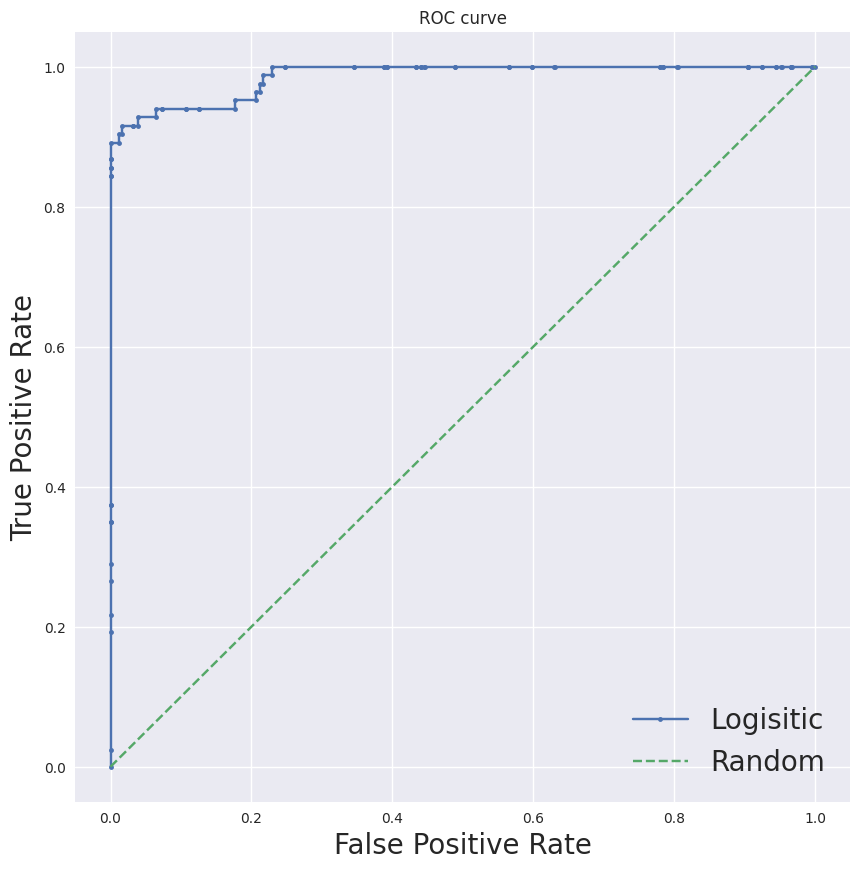

In [19]:
#X_test에 대해 y=1일 확률
probs=model.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 Class를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels = [1, 0]),
    index = ['true:purchased(1)', 'true:purchased(0)'],
    columns = ['pred:purchased(1)', 'pred:purchased(0)']
)
print("cmtx : ", cmtx)
print()

cmtx :                     pred:purchased(1)  pred:purchased(0)
true:purchased(1)                 57                 26
true:purchased(0)                  2               8519



In [43]:

# 모델 훈련하기
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train, y_train)

# predict_proba: X_test의 각 값을 0으로 예측할 확률과 1로 예측할 확률을 보여줌
# 그 중 각 값을 1로 예측할 확률들만 가져옴
prob1 = classifer.predict_proba(X_test)[:,1] # [ 0.45491443, 0.47404153, ... ]


# cutoff 0.6로 수정
cutoff = 0.6

# Y_pred_new_cutof: 새로운 cutoff를 적용한 예측치
y_pred_new_cutoff = [1 if i > cutoff else 0 for i in prob1]
y_pred_new_cutoff



# 모델 평가하기1
# Confusion matrix.
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_new_cutoff, labels = [1, 0]),
    index = ['true:purchased(1)', 'true:purchased(0)'],
    columns = ['pred:purchased(1)', 'pred:purchased(0)']
)
print("cmtx : ", cmtx)
print()

# 모델 평가하기2 (다양한 라이브러리 활용하기)
# accuracy 구하기
from sklearn.metrics import accuracy_score
print("accuracy : ", accuracy_score(y_test, y_pred_new_cutoff))

# precision, recall, fscore 구하기
from sklearn.metrics import precision_recall_fscore_support
print("(precision, recall, fscore, support) = ", precision_recall_fscore_support(y_test, y_pred_new_cutoff, average='binary'))

cmtx :                     pred:purchased(1)  pred:purchased(0)
true:purchased(1)                 70                 13
true:purchased(0)                  2               8519

accuracy :  0.9982566248256625
(precision, recall, fscore, support) =  (0.9722222222222222, 0.8433734939759037, 0.903225806451613, None)


In [46]:

# 모델 훈련하기
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train, y_train)

# predict_proba: X_test의 각 값을 0으로 예측할 확률과 1로 예측할 확률을 보여줌
# 그 중 각 값을 1로 예측할 확률들만 가져옴
prob1 = classifer.predict_proba(X_test)[:,1] # [ 0.45491443, 0.47404153, ... ]


# cutoff 0.1로 수정
cutoff = 0.1

# Y_pred_new_cutof: 새로운 cutoff를 적용한 예측치
y_pred_new_cutoff = [1 if i > cutoff else 0 for i in prob1]
y_pred_new_cutoff



# 모델 평가하기1
# Confusion matrix.
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_new_cutoff, labels = [1, 0]),
    index = ['true:purchased(1)', 'true:purchased(0)'],
    columns = ['pred:purchased(1)', 'pred:purchased(0)']
)
print("cmtx : ", cmtx)
print()

# 모델 평가하기2 (다양한 라이브러리 활용하기)
# accuracy 구하기
from sklearn.metrics import accuracy_score
print("accuracy : ", accuracy_score(y_test, y_pred_new_cutoff))

# precision, recall, fscore 구하기
from sklearn.metrics import precision_recall_fscore_support
print("(precision, recall, fscore, support) = ", precision_recall_fscore_support(y_test, y_pred_new_cutoff, average='binary'))

cmtx :                     pred:purchased(1)  pred:purchased(0)
true:purchased(1)                 72                 11
true:purchased(0)                 10               8511

accuracy :  0.9975592747559274
(precision, recall, fscore, support) =  (0.8780487804878049, 0.8674698795180723, 0.8727272727272728, None)


- 성능향상을 위해 standardScaler사용, cutoff 조절
- 고객이 구매하지 않은 항목에 대해 비용이 청구되지 않도록 신용 카드 회사가 사기 신용 카드 거래를 인식할 수 있는 것이 중요함 -> 실제 금융거래사기(P)를 정상거래(N)으로 잘못 판단하게 되면 회사에 미치는 손해가 크기 때문에 Recall을 기준으로 성능 향상 진행